In [1]:
import sys

sys.path.append('/home/ykgroup/crazyswarm/ros_ws/src/crazyswarm/scripts/crazyflie_ws')
sys.path.append('/home/ykgroup/crazyswarm/ros_ws/src/crazyswarm/scripts')

import numpy as np
from utils import conv_wp_poly as conv
import matplotlib.pyplot as plt

# construct waypoints

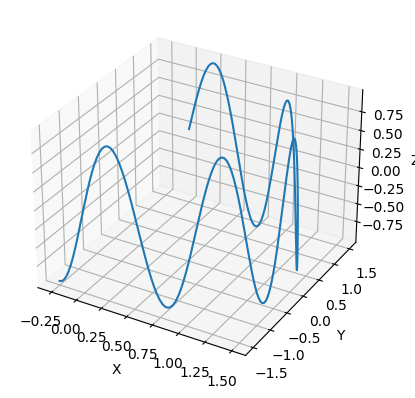

In [2]:
def create_waypoints():
    dt = .05
    N = 200
    t_span = np.linspace(0,dt*(N-1),N)

    wp = np.zeros((N,4))

    wp[:,0] = t_span

    R = 1.5
    w = 1/3
    wp[:,1] = R*np.sin(t_span*w)
    wp[:,2] = R*np.cos(t_span*w)
    wp[:,3] = 1*np.sin(t_span*3)
    return wp

def plot_waypoints(wps):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting
    for wp in wps:
        ax.plot(wp[:, 1], wp[:, 2], wp[:, 3])

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    plt.show()
    
wp = create_waypoints()
plot_waypoints([wp])

# validate conversion

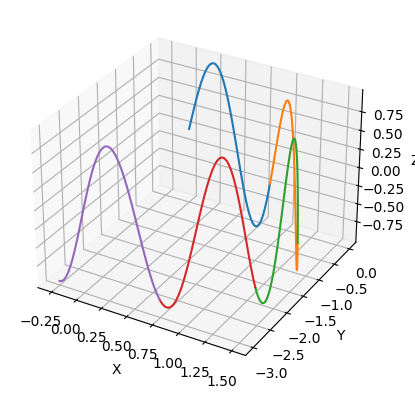

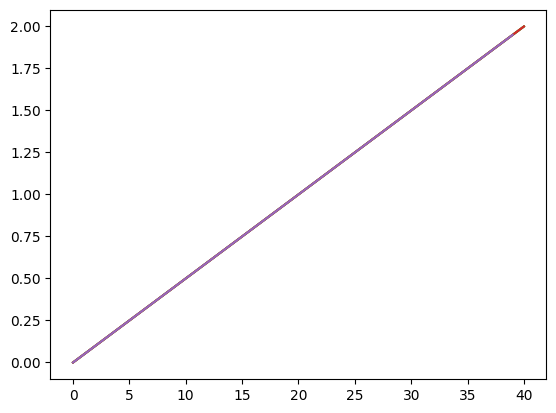

In [3]:
def plot_time_idx(ts):
    for t in ts:
        plt.plot(t)
        
    plt.show()
    
wp = create_waypoints()
conv_poly = conv.Convert_waypoints_to_poly(wp, seg_num=5)

# this should plot the same as the previous one
# with shifted coordiante
plot_waypoints(conv_poly.wp)

# you are supposed to see one straight increasing line 
# multiple lines are overlapped 
plot_time_idx([w[:,0] for w in conv_poly.wp])



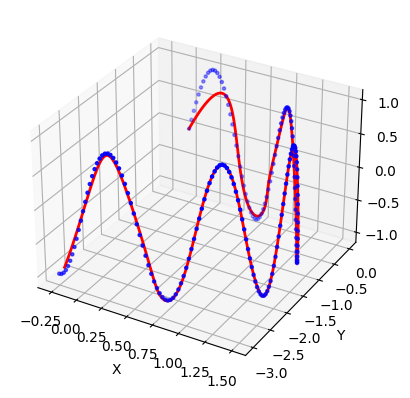

In [4]:
# set print_level=0 for no output
conv_poly.convert(print_level=0)

# mismatch towards the end is due to the non-static of the end waypoint 
conv_poly.plot(wp)

In [5]:
conv_poly.to_csv('test.csv')

Data has been written to ../data_base/test.csv


0